In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-sizeing all the images to dataset
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/aug_rust2/Train'
valid_path = '/content/drive/MyDrive/aug_rust2/Test'

In [ ]:
# adding preprocessing layer to the front of Xception
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
  layer.trainable = False

In [ ]:
# for getting number of classes
folders = glob('/content/drive/MyDrive/aug_rust2/Train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
folders

['/content/drive/MyDrive/aug_rust2/Train/Healthy',
 '/content/drive/MyDrive/aug_rust2/Train/Rust']

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

Compilation

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  # optimizer='adam',
  optimizer='SGD',
  metrics=['accuracy']
)

Image Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Rust disease/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Rust disease/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 892 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


Fit generator

In [ ]:
import tensorflow as tf

from keras.models import load_model

In [ ]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
28/28 [==============================] - 325s 11s/step - loss: 157.9449 - accuracy: 0.5022 - val_loss: 56.0826 - val_accuracy: 0.5000
Epoch 2/10
28/28 [==============================] - 251s 9s/step - loss: 185.0750 - accuracy: 0.4776 - val_loss: 310.8593 - val_accuracy: 0.5000
Epoch 3/10
28/28 [==============================] - 247s 9s/step - loss: 173.3092 - accuracy: 0.5135 - val_loss: 88.4630 - val_accuracy: 0.5000
Epoch 4/10
28/28 [==============================] - 267s 9s/step - loss: 175.7695 - accuracy: 0.4910 - val_loss: 208.7988 - val_accuracy: 0.5000
Epoch 5/10
28/28 [==============================] - 242s 9s/step - loss: 168.9812 - accuracy: 0.5090 - val_loss: 222.7794 - val_accuracy: 0.5000
Epoch 6/10
28/28 [==============================] - 263s 9s/step - loss: 172.5981 - accuracy: 0.5045 - val_loss: 19.5550 - val_accuracy: 0.5200
Epoch 7/10
28/28 [==============================] - 266s 9s/step - loss: 159.6690 - accuracy: 0.5101 - val_loss: 236.5237 - val_accu

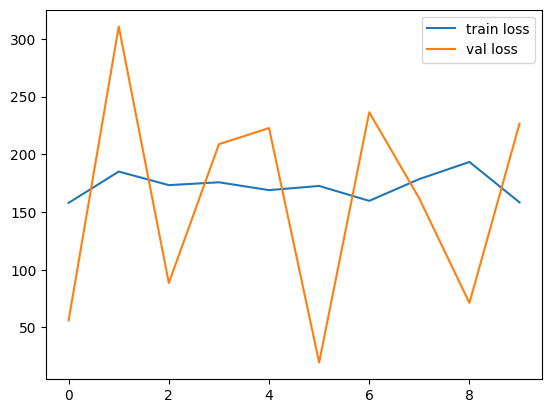

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('LossVal_loss')
plt.show()

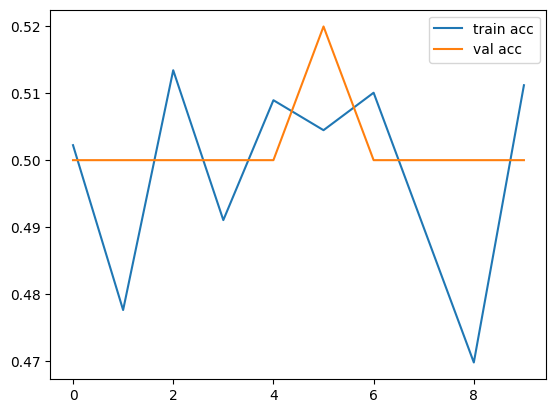

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<Figure size 640x480 with 0 Axes>

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

model.save('facefeatures_new_model.h5')